In [1]:
% matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.io

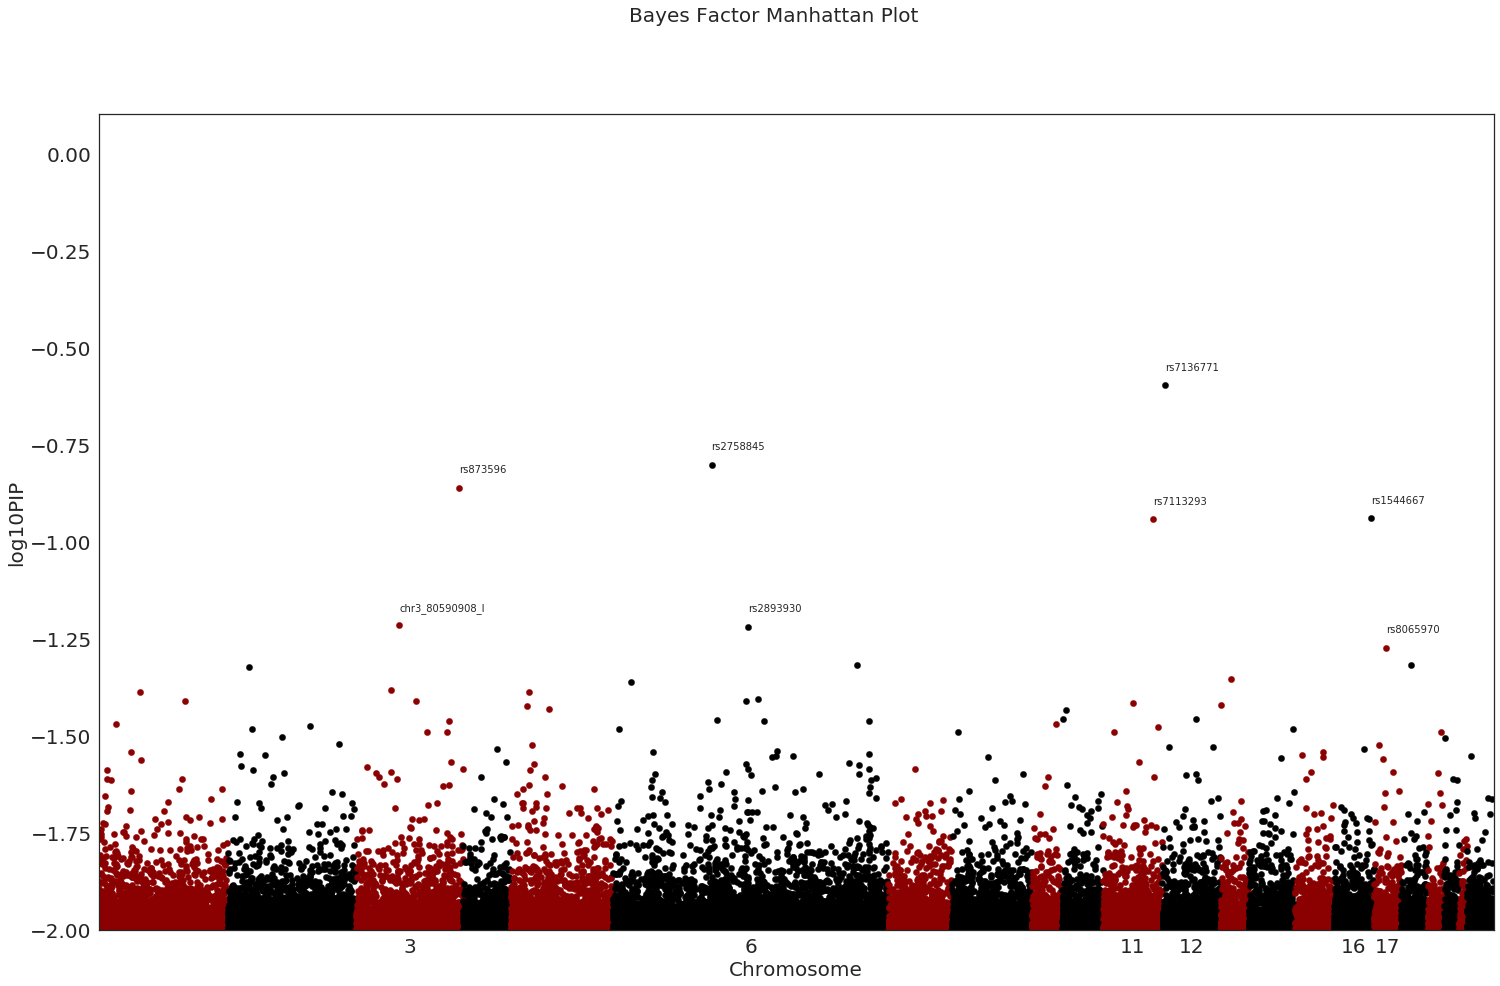

In [44]:
sns.set_style('white')

colors = np.tile(['darkred','black'], 11)

name = 'VWM'
snpsloc = pd.read_csv('/storage/gablab001/data/genus/current/structured/cog-gen-bayes/data/100k_snp_loc_pval.csv')
tp = '/storage/gablab001/data/genus/current/structured/cog-gen-bayes/output_bf'
toplot = scipy.io.loadmat(os.path.join(tp, '100ksnp_{}domainAvgZ.mat'.format(name)))
snpsloc['PIP'] = toplot['PIP']
snpsloc['log10PIP'] = np.log10(snpsloc['PIP'])
df = snpsloc.copy()
df.columns = ['chromosome', 'pvalue', 'snpid', 'PIP', 'log10PIP']
df['chrnum'] = [int(i[3:]) for i in df.chromosome]
df = df.sort_values('chrnum')
df['ind'] = range(len(df))
grouped = df.groupby(('chrnum'))

snp_thresh_list = []

def plot_manhattan(data, plot_name, pip_thresh):
    fig = plt.figure(figsize=(25,15))
    fig.suptitle('Bayes Factor Manhattan Plot', fontsize=20)
    ax = fig.add_subplot(111)
    x_labels = []
    x_labels_pos = []
    for num, (name, group) in enumerate(data):
        group.plot(kind = 'scatter',  x = 'ind',
                   y = 'log10PIP', colors = colors[num % len(colors)],
                   ax = ax, s=40)
        tf_vals = group['PIP'] > pip_thresh
        if np.any(tf_vals):
            x_labels.append(name)
            x_locs = group['ind'][tf_vals].values
            y_locs = group['log10PIP'][tf_vals].values
            snps = group['snpid'][tf_vals].values
            snp_thresh_list.extend(snps)
            for i in range(len(x_locs)):
                plt.annotate('{}'.format(snps[i]),
                            xy=(x_locs[i], y_locs[i]+.04), size=10)
        else:
            x_labels.append('')
        x_labels_pos.append((group['ind'].iloc[-1] - \
            (group['ind'].iloc[-1] - group['ind'].iloc[0]) / 2))
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(x_labels)
    ax.set_xlim([0, max(group['ind'])])
    ax.set_ylim([-2, 0.1])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Chromosome', fontsize=20)
    plt.ylabel('log10PIP', fontsize=20)
    plt.savefig('{}_manhattan.png'.format(plot_name), bbox_inches='tight')
    #plt.close(fig)

plot_manhattan(grouped, name, .05)
np.savetxt("{}_snps_pass_thresh.txt".format(name), snp_thresh_list, fmt="%s")

In [ ]:
lower_bounds = {
    'rps':-3.8,
    'sop':-1.84,
    'spa':-2.43,
    'tvi':-2.7,
    'vlm':-4,
    'vwm':-2
}